In [9]:
import pandas as pd
def load_dataset(file_path: str) -> pd.DataFrame:
    """
    Load dataset from a CSV file and return as a DataFrame.
    
    :param file_path: Path to the CSV file.
    :return: DataFrame containing the dataset.
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return pd.DataFrame()  # Return empty DataFrame on error

In [10]:
import pandas as pd

# --- Your Final Feature List ---
TIME_DOMAIN_FEATURES = [
    "Magnitude_mean",
    "Magnitude_std_dev",
    "Magnitude_var",
    "Magnitude_rms",
    "Magnitude_maxmin_diff",
    
]

FREQ_DOMAIN_FEATURES = [
    "Magnitude_fft_energy",
    "Magnitude_fft_entropy",
    
    "Magnitude_fft_tot_power",
    
    "Magnitude_fft_flatness"
]

FINAL_FEATURES = [
    "Constancy_of_rest",
    "Kinetic_tremor",	
    "Postural_tremor",	
    "Rest_tremor"]


ALL_FEATURES = TIME_DOMAIN_FEATURES + FREQ_DOMAIN_FEATURES + FINAL_FEATURES


# --- Function 1: Select all final features ---
def select_all_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns DataFrame containing only the 12 selected features.
    """
    return df[ALL_FEATURES]


# --- Function 2: Select only one feature ---
def select_feature(df: pd.DataFrame, feature_name: str) -> pd.DataFrame:
    """
    Returns DataFrame containing only the given feature column.
    Raises error if feature is not in the selected list.
    """
    if feature_name not in ALL_FEATURES:
        raise ValueError(f"'{feature_name}' is not in the selected feature list.")
    return df[[feature_name]]


In [11]:
import sys
import os


# from utils.ExtractFeatures import select_all_features
# from utils.LoadDataset import load_dataset
import pandas as pd


#loading the dataset
df = load_dataset("Data/ALAMEDA_PD_tremor_dataset.csv")

df = select_all_features(df)




In [12]:
df


,Magnitude_mean,Magnitude_std_dev,Magnitude_var,Magnitude_rms,Magnitude_maxmin_diff,Magnitude_fft_energy,Magnitude_fft_entropy,Magnitude_fft_tot_power,Magnitude_fft_flatness,Constancy_of_rest,Kinetic_tremor,Postural_tremor,Rest_tremor
0,0.026806,0.030615,0.000937,0.040692,0.388896,4.857954,3.515421,0.236743,0.016937,1,0,0,0
1,0.013529,0.013011,0.000169,0.018770,0.171819,1.095313,3.057381,0.053378,0.013811,1,0,0,0
2,0.007208,0.004947,0.000024,0.008742,0.043118,0.262650,2.063822,0.012800,0.009553,1,0,0,0
3,0.006784,0.005212,0.000027,0.008555,0.043118,0.243898,2.379058,0.011886,0.010631,1,0,0,0
4,0.008007,0.006779,0.000046,0.010491,0.065573,0.356369,2.619443,0.017367,0.011380,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4146,0.011456,0.009599,0.000092,0.014947,0.097747,0.725611,2.643844,0.035361,0.007765,1,0,0,1
4147,0.021618,0.022806,0.000520,0.031424,0.174130,2.976482,2.927233,0.145053,0.005556,1,0,0,1
4148,0.070097,0.114035,0.013004,0.133856,1.219933,46.712175,4.387868,2.276426,0.013295,1,0,0,1
4149,0.067447,0.114021,0.013001,0.132476,1.220661,45.214679,4.485634,2.203449,0.013295,1,0,0,1


In [13]:
y_const = df["Constancy_of_rest"]
y_kin   = df["Kinetic_tremor"]
y_post  = df["Postural_tremor"]
y_rest  = df["Rest_tremor"]

### DOING PCA ANALYSIS

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

def apply_pca(df: pd.DataFrame, n_components: int = 2):
    """
    Apply Principal Component Analysis (PCA) to a feature dataframe.
    
    Parameters
    ----------
    df : pd.DataFrame
        The dataframe containing only the extracted features (numeric values).
        Labels/target columns should be excluded before passing.
    n_components : int, optional (default=2)
        Number of principal components to keep.
    
    Returns
    -------
    pca_df : pd.DataFrame
        Dataframe containing the transformed PCA components.
    pca_model : PCA
        The fitted PCA model (can be used later to transform test data).
    """
    
    # Standardize the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(scaled_data)
    
    # Convert to DataFrame
    pca_columns = [f"PC{i+1}" for i in range(n_components)]
    pca_df = pd.DataFrame(pca_data, columns=pca_columns)
    
    return pca_df, pca


In [16]:
pca_df, pca_model = apply_pca(df, n_components=3)

In [22]:
X = pca_df

In [23]:
X

,PC1,PC2,PC3
0,-0.938657,-0.612726,1.566607
1,-1.563157,-0.623537,0.901676
2,-1.937157,-0.573384,-0.211621
3,-1.905304,-0.595239,0.102980
4,-1.829752,-0.607642,0.342712
...,...,...,...
4146,-1.776330,0.438184,0.062138
4147,-1.374834,0.460054,0.054608
4148,2.122330,0.653162,1.997804
4149,2.088826,0.643231,2.078963


### BUILDING MODEL

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

KINETIC

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_kin, test_size=0.2, random_state=42)

model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

# Evaluate
y_pred = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       809
           1       1.00      1.00      1.00        22

    accuracy                           1.00       831
   macro avg       1.00      1.00      1.00       831
weighted avg       1.00      1.00      1.00       831



### POSTURAL

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_post, test_size=0.2, random_state=42)

model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train, y_train)

# Evaluate
y_pred = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9807460890493381
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       676
           1       0.99      0.91      0.95       155

    accuracy                           0.98       831
   macro avg       0.98      0.95      0.97       831
weighted avg       0.98      0.98      0.98       831



### REST

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_rest, test_size=0.2, random_state=42)

model2 = RandomForestClassifier(random_state=42,criterion="gini",n_estimators=200)
model2.fit(X_train, y_train)

# Evaluate
y_pred = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9711191335740073
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       518
           1       0.94      0.99      0.96       313

    accuracy                           0.97       831
   macro avg       0.97      0.97      0.97       831
weighted avg       0.97      0.97      0.97       831



### CONST

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y_const, test_size=0.3, random_state=0)

model2 = RandomForestClassifier(random_state=0)
model2.fit(X_train, y_train)

# Evaluate
y_pred = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9967897271268058
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       292
           1       1.00      1.00      1.00       954

    accuracy                           1.00      1246
   macro avg       1.00      0.99      1.00      1246
weighted avg       1.00      1.00      1.00      1246



Running plot functions...
Saved training accuracy plot for Kinetic Tremor as training_accuracy_kinetic_tremor.png


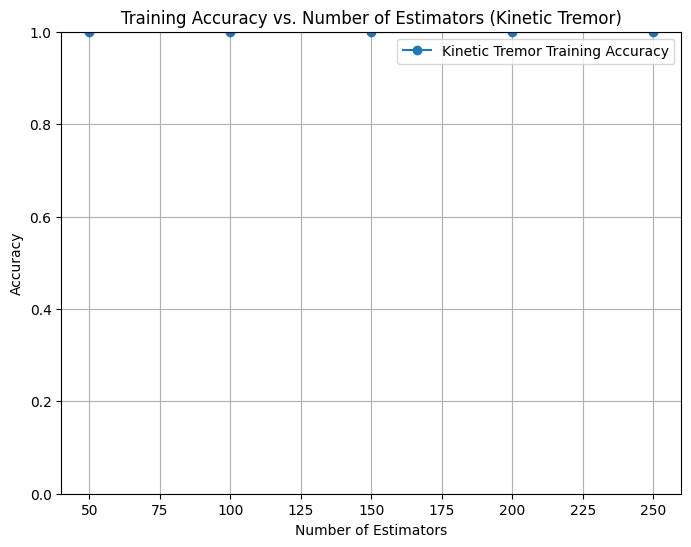

Saved testing accuracy plot for Kinetic Tremor as testing_accuracy_kinetic_tremor.png


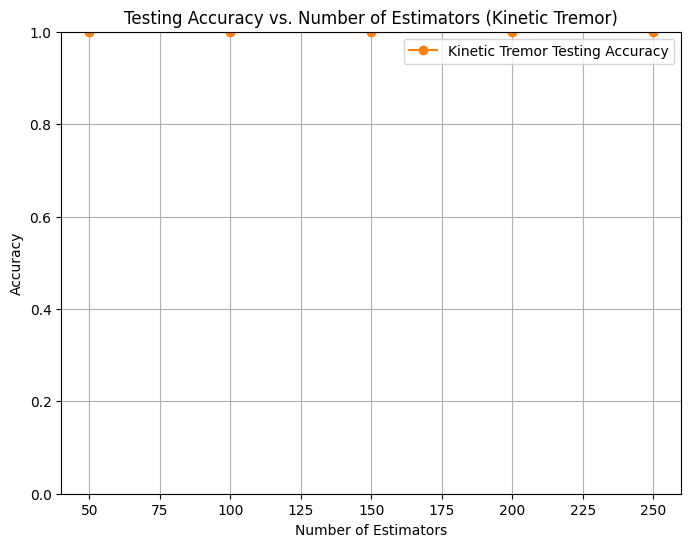


Analysis for Kinetic Tremor:
Average Training Accuracy: 1.0000
Average Testing Accuracy: 1.0000
Good: Training and testing accuracies are close, indicating minimal overfitting.
Saved training accuracy plot for Postural Tremor as training_accuracy_postural_tremor.png


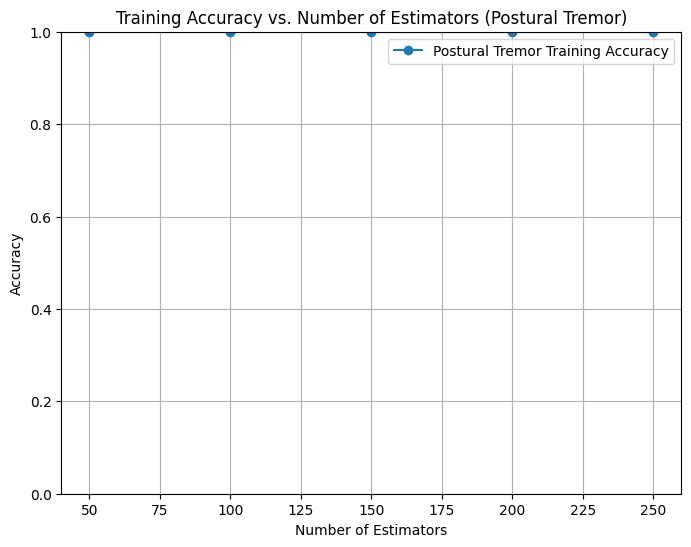

Saved testing accuracy plot for Postural Tremor as testing_accuracy_postural_tremor.png


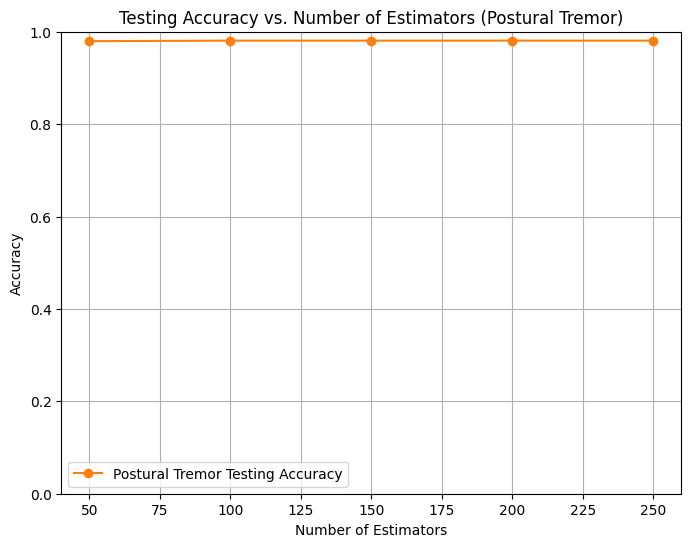


Analysis for Postural Tremor:
Average Training Accuracy: 1.0000
Average Testing Accuracy: 0.9805
Good: Training and testing accuracies are close, indicating minimal overfitting.
Saved training accuracy plot for Rest Tremor as training_accuracy_rest_tremor.png


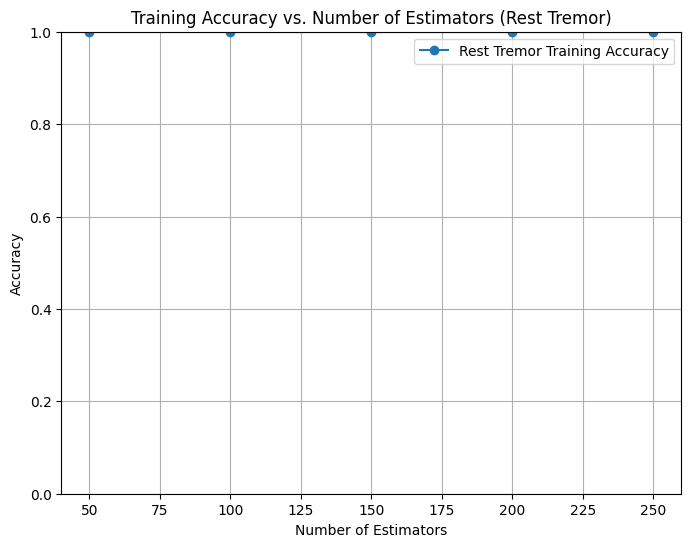

Saved testing accuracy plot for Rest Tremor as testing_accuracy_rest_tremor.png


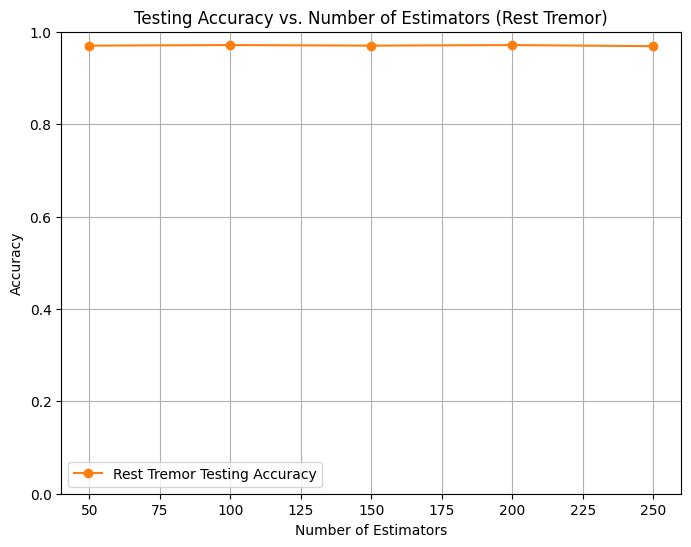


Analysis for Rest Tremor:
Average Training Accuracy: 1.0000
Average Testing Accuracy: 0.9702
Good: Training and testing accuracies are close, indicating minimal overfitting.
Saved training accuracy plot for Constancy of Rest as training_accuracy_constancy_of_rest.png


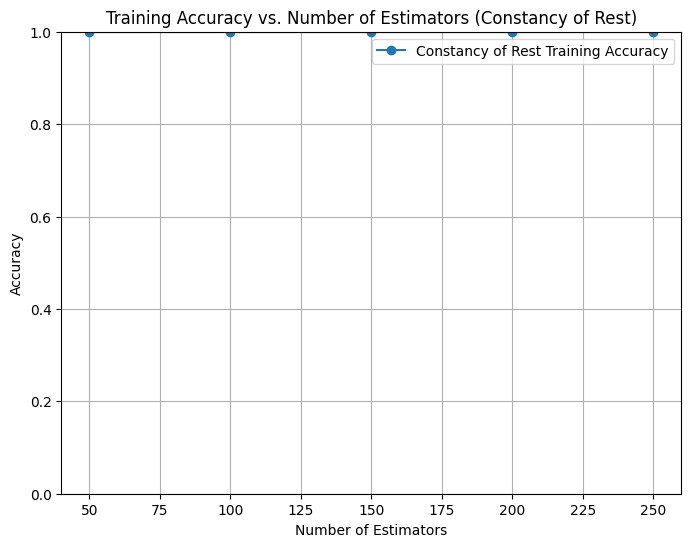

Saved testing accuracy plot for Constancy of Rest as testing_accuracy_constancy_of_rest.png


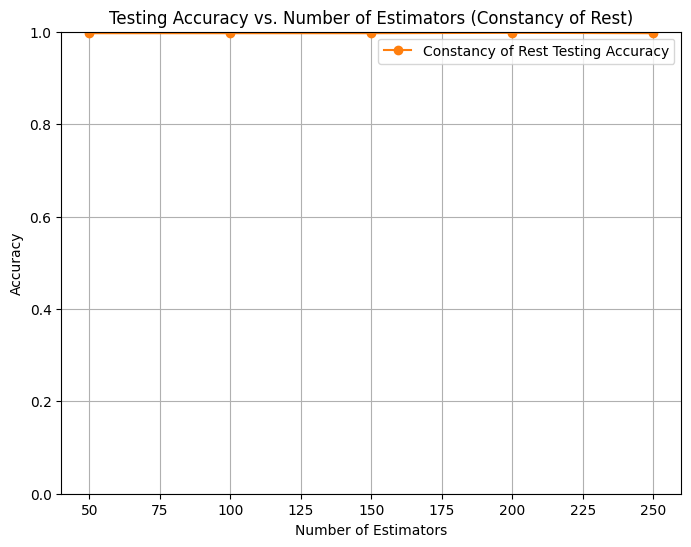


Analysis for Constancy of Rest:
Average Training Accuracy: 1.0000
Average Testing Accuracy: 0.9970
Good: Training and testing accuracies are close, indicating minimal overfitting.


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import sys
import os

# Ensure Matplotlib uses the correct backend for Jupyter
%matplotlib inline
plt.ion()  # Enable interactive mode

def plot_model_performance(X, y, target_name, test_size=0.2, random_state=42):
    """
    Plot training and testing accuracy for a RandomForestClassifier model
    across different numbers of estimators to assess overfitting using Matplotlib.

    Parameters
    ----------
    X : pd.DataFrame
        Feature dataframe after PCA.
    y : pd.Series
        Target variable.
    target_name : str
        Name of the target variable for labeling the plots.
    test_size : float, optional (default=0.2)
        Proportion of the dataset to include in the test split.
    random_state : int, optional (default=42)
        Random state for reproducibility.
    """
    # Input validation
    if not isinstance(X, pd.DataFrame) or not isinstance(y, (pd.Series, np.ndarray)):
        print(f"Error: Invalid input types for {target_name}. X must be a DataFrame, y must be a Series or array.")
        return
    if X.empty or len(y) == 0:
        print(f"Error: Empty input data for {target_name}.")
        return
    if len(X) != len(y):
        print(f"Error: Mismatch in lengths of X ({len(X)}) and y ({len(y)}) for {target_name}.")
        return

    # Split the data
    try:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    except Exception as e:
        print(f"Error in train_test_split for {target_name}: {e}")
        return

    # Vary number of estimators
    estimators = [50, 100, 150, 200, 250]
    train_accuracies = []
    test_accuracies = []
    
    for n in estimators:
        try:
            # Train model
            model = RandomForestClassifier(n_estimators=n, random_state=random_state, criterion="gini")
            model.fit(X_train, y_train)
            
            # Calculate accuracies
            train_pred = model.predict(X_train)
            test_pred = model.predict(X_test)
            train_accuracies.append(accuracy_score(y_train, train_pred))
            test_accuracies.append(accuracy_score(y_test, test_pred))
        except Exception as e:
            print(f"Error training model for {target_name} with n_estimators={n}: {e}")
            return

    # Plot Training Accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(estimators, train_accuracies, marker='o', linestyle='-', color='#1f77b4', label=f'{target_name} Training Accuracy')
    plt.title(f'Training Accuracy vs. Number of Estimators ({target_name})')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    
    # Save the plot
    train_filename = f'training_accuracy_{target_name.lower().replace(" ", "_")}.png'
    try:
        plt.savefig(train_filename)
        print(f"Saved training accuracy plot for {target_name} as {train_filename}")
    except Exception as e:
        print(f"Error saving training accuracy plot for {target_name}: {e}")
    
    plt.show()
    
    # Plot Testing Accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(estimators, test_accuracies, marker='o', linestyle='-', color='#ff7f0e', label=f'{target_name} Testing Accuracy')
    plt.title(f'Testing Accuracy vs. Number of Estimators ({target_name})')
    plt.xlabel('Number of Estimators')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    
    # Save the plot
    test_filename = f'testing_accuracy_{target_name.lower().replace(" ", "_")}.png'
    try:
        plt.savefig(test_filename)
        print(f"Saved testing accuracy plot for {target_name} as {test_filename}")
    except Exception as e:
        print(f"Error saving testing accuracy plot for {target_name}: {e}")
    
    plt.show()
    
    # Analyze overfitting
    avg_train_acc = np.mean(train_accuracies)
    avg_test_acc = np.mean(test_accuracies)
    print(f"\nAnalysis for {target_name}:")
    print(f"Average Training Accuracy: {avg_train_acc:.4f}")
    print(f"Average Testing Accuracy: {avg_test_acc:.4f}")
    if avg_train_acc - avg_test_acc > 0.1:
        print("Warning: Potential overfitting detected (large gap between training and testing accuracy).")
    elif avg_train_acc - avg_test_acc > 0.05:
        print("Note: Slight overfitting possible (moderate gap between training and testing accuracy).")
    else:
        print("Good: Training and testing accuracies are close, indicating minimal overfitting.")

# Functions for each model
def plot_kinetic_tremor_model(X, y_kin):
    plot_model_performance(X, y_kin, "Kinetic Tremor", test_size=0.2, random_state=42)

def plot_postural_tremor_model(X, y_post):
    plot_model_performance(X, y_post, "Postural Tremor", test_size=0.2, random_state=42)

def plot_rest_tremor_model(X, y_rest):
    plot_model_performance(X, y_rest, "Rest Tremor", test_size=0.2, random_state=42)

def plot_constancy_of_rest_model(X, y_const):
    plot_model_performance(X, y_const, "Constancy of Rest", test_size=0.3, random_state=0)

# Check if data is available before running
try:
    if 'X' not in globals() or 'y_kin' not in globals() or 'y_post' not in globals() or 'y_rest' not in globals() or 'y_const' not in globals():
        print("Error: One or more required variables (X, y_kin, y_post, y_rest, y_const) are not defined.")
    else:
        print("Running plot functions...")
        plot_kinetic_tremor_model(X, y_kin)
        plot_postural_tremor_model(X, y_post)
        plot_rest_tremor_model(X, y_rest)
        plot_constancy_of_rest_model(X, y_const)
except NameError as e:
    print(f"Error: {e}")

In [33]:

# Functions for each model
def plot_kinetic_tremor_model(X, y_kin):
    plot_model_performance(X, y_kin, "Kinetic Tremor", test_size=0.2, random_state=42)


In [32]:

def plot_postural_tremor_model(X, y_post):
    plot_model_performance(X, y_post, "Postural Tremor", test_size=0.2, random_state=42)

def plot_rest_tremor_model(X, y_rest):
    plot_model_performance(X, y_rest, "Rest Tremor", test_size=0.2, random_state=42)

def plot_constancy_of_rest_model(X, y_const):
    plot_model_performance(X, y_const, "Constancy of Rest", test_size=0.3, random_state=0)